In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import pandas_profiling

import itertools

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("jewelry_customers.csv")

In [3]:
df.info()
df.head()
df.dtypes
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


Age                int64
Income             int64
SpendingScore    float64
Savings          float64
dtype: object

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [4]:
#pandas_profiling.ProfileReport(df)

In [5]:
X = df.copy()

In [6]:
scaler = StandardScaler()
features = ['Age', 'Income', 'Savings', 'SpendingScore']
X[features] = scaler.fit_transform(X[features])

In [7]:
X

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
...,...,...,...,...
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452


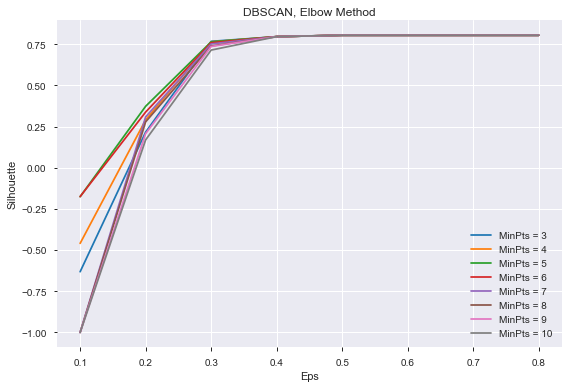

In [8]:
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(X)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(X, db.labels_, metric='euclidean')
    

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();


In [9]:
def do_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels)
    
    if n_clusters <= 1:
        print('eps={}, min_samples={}, n_clusters <= 1. Returning.'.format(eps, min_samples))
        return
    
    sil = silhouette_score(X, db.labels_)
    print("eps={}, min_samples={}, n_clusters={}, sil={}".format(eps, min_samples, n_clusters, sil))
    

epss = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
min_samples = range(1, 10)

for prod in list(itertools.product(epss, min_samples)):
    do_dbscan(X, prod[0], prod[1])

eps=0.1, min_samples=1, n_clusters=430, sil=0.07622070845434117
eps=0.1, min_samples=2, n_clusters=48, sil=-0.5282666637526231
eps=0.1, min_samples=3, n_clusters=15, sil=-0.6313739076946371
eps=0.1, min_samples=4, n_clusters=4, sil=-0.4590423145194752
eps=0.1, min_samples=5, n_clusters=3, sil=-0.17554431615393226
eps=0.1, min_samples=6, n_clusters=2, sil=-0.17493225898474807
eps=0.1, min_samples=7, n_clusters <= 1. Returning.
eps=0.1, min_samples=8, n_clusters <= 1. Returning.
eps=0.1, min_samples=9, n_clusters <= 1. Returning.
eps=0.2, min_samples=1, n_clusters=85, sil=-0.15312504415260234
eps=0.2, min_samples=2, n_clusters=18, sil=0.03929797371993923
eps=0.2, min_samples=3, n_clusters=12, sil=0.21650895666875328
eps=0.2, min_samples=4, n_clusters=9, sil=0.29103834394984224
eps=0.2, min_samples=5, n_clusters=7, sil=0.37355056274945037
eps=0.2, min_samples=6, n_clusters=6, sil=0.33843571870862393
eps=0.2, min_samples=7, n_clusters=5, sil=0.30897875484400195
eps=0.2, min_samples=8, n_cl

In [10]:
db = DBSCAN(eps=0.5, min_samples=3)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [11]:
db.labels_

array([0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 4, 4, 4, 0, 3, 0, 1, 1, 3, 4, 3,
       0, 1, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 4, 0, 1, 2, 0,
       0, 2, 3, 2, 4, 0, 1, 4, 2, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 4, 1, 1, 4, 0, 4, 0, 0, 2, 0, 3, 0, 1, 1, 4, 4, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 4, 0, 0, 4, 4, 2, 4, 2, 4, 1, 1, 4, 4, 0,
       1, 4, 0, 4, 4, 4, 0, 4, 2, 1, 4, 1, 1, 1, 4, 3, 0, 1, 0, 0, 4, 0,
       4, 0, 2, 1, 3, 2, 0, 4, 1, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 4, 1, 0,
       1, 3, 4, 0, 1, 0, 4, 1, 0, 4, 1, 4, 1, 0, 4, 0, 1, 0, 4, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 4, 2, 2, 1, 4, 0, 0, 0, 4, 1, 0, 0, 0, 1, 2, 4,
       1, 1, 1, 4, 0, 4, 0, 4, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 2, 4, 1,
       0, 0, 4, 1, 4, 2, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 4, 4, 2, 0,
       0, 0, 3, 0, 4, 1, 2, 2, 2, 1, 0, 4, 1, 1, 4, 4, 0, 0, 3, 0, 0, 1,
       0, 1, 4, 2, 0, 4, 1, 0, 1, 1, 4, 0, 1, 1, 0, 0, 1, 4, 4, 3, 4, 1,
       1, 4, 3, 1, 1, 2, 0, 4, 4, 0, 4, 1, 1, 4, 0,

In [12]:
X_tmp = scaler.inverse_transform(X)

In [13]:
for label in set(db.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = df[db.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(13)


Cluster 0:


,Age,Income,SpendingScore,Savings
467,61.000000,72027.000000,0.762325,6926.123598
469,63.000000,70580.000000,0.766509,7262.108723
470,58.000000,70676.000000,0.764028,7664.415651
472,62.000000,73675.000000,0.796619,4688.657157
473,60.000000,63476.000000,0.751900,7543.542802
474,62.000000,67731.000000,0.819170,5956.555677
478,65.000000,70430.000000,0.696994,6971.164886
479,59.000000,69408.000000,0.879906,6491.771150
480,65.000000,71229.000000,0.787890,9024.337461
491,58.000000,70369.000000,0.904520,7461.567503



Cluster 1:


,Age,Income,SpendingScore,Savings
485,90.00000,22782.000000,0.356307,15924.071708
486,91.00000,28165.000000,0.303693,17460.179350
488,92.00000,18724.000000,0.327862,15341.381110
489,97.00000,27271.000000,0.283923,14928.165597
490,84.00000,36463.000000,0.353621,16563.372591
493,92.00000,36032.000000,0.336968,17348.599881
494,87.00000,29909.000000,0.342152,18142.232747
497,91.00000,30756.000000,0.303698,15492.004711
501,93.00000,19934.000000,0.203140,17969.693769
502,90.00000,35297.000000,0.355149,16091.401954



Cluster 2:


,Age,Income,SpendingScore,Savings
406,25.00,120957.00,0.877673,5590.447216
412,21.00,129726.00,0.951792,4550.799522
415,26.00,125662.00,0.926818,6089.478323
442,17.00,136255.00,0.935876,4126.226651
445,24.00,120465.00,0.907485,4838.348350
451,27.00,122671.00,0.910107,4206.287239
456,17.00,123828.00,0.942013,3798.840400
458,28.00,127699.00,0.881425,5490.814956
466,18.00,123718.00,0.806553,4420.445821
487,26.00,123005.00,0.984526,4371.234733



Cluster 3:


,Age,Income,SpendingScore,Savings
283,90.0,124170.00,0.030751,14773.407206
288,83.0,117347.00,0.155694,15086.701120
311,85.0,118169.00,0.123196,14855.951024
312,88.0,114767.00,0.032208,17833.093470
343,84.0,115237.00,0.068778,14396.568282
351,91.0,118794.00,0.019212,14047.388986
353,77.0,128596.00,0.040824,14503.410786
368,84.0,110582.00,0.079049,14937.995170
383,87.0,117564.00,0.128280,14000.248965
414,88.0,123651.00,0.029027,13504.577572



Cluster 4:


,Age,Income,SpendingScore,Savings
454,31.000000,107932.000000,0.374242,12207.526078
457,35.000000,110106.000000,0.286769,14924.537223
460,28.000000,100592.000000,0.259598,15520.355776
461,33.000000,116616.000000,0.320930,15104.498114
463,28.000000,94762.000000,0.303596,15352.521937
468,32.000000,117050.000000,0.311356,14310.546207
471,31.000000,101209.000000,0.304323,16917.571691
476,33.000000,106757.000000,0.258396,14431.652799
477,33.000000,107100.000000,0.342435,14895.473479
482,32.000000,108417.000000,0.287371,16696.398659


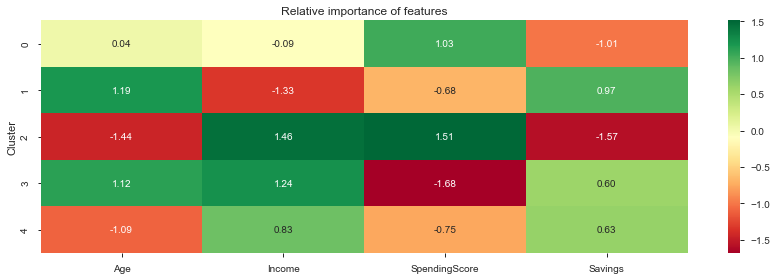

In [14]:
dat = X.copy()

dat['Cluster'] = db.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(12, 4));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');

In [15]:
df['Cluster'] = db.labels_

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
 4   Cluster        505 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 19.9 KB


In [17]:
df.groupby('Cluster').agg(['min','max','mean']).round(2).transpose()

Cluster                    0         1          2          3          4
Age           min      51.00     79.00      17.00      77.00      22.00
              max      68.00     97.00      31.00      93.00      44.00
              mean     59.96     87.78      24.18      86.00      32.78
Income        min   56321.00  12000.00  117108.00  110582.00   89598.00
              max   90422.00  46977.00  142000.00  128596.00  119877.00
              mean  72448.06  27866.10  128029.12  119944.04  105265.81
SpendingScore min       0.66      0.20       0.81       0.00       0.17
              max       0.91      0.47       1.00       0.16       0.41
              mean      0.77      0.33       0.90       0.07       0.31
Savings       min    4077.66  13470.97       0.00   12554.69   12207.53
              max   10547.78  20000.00    6089.48   17833.09   17968.55
              mean   6889.97  16659.26    4087.52   14808.68   14962.78